## The purpose of this file
See how well the maximum likelihood estimation works by comparing actual values and theoretical values. The data have already obtained in each working directory. Here, just plot the actual values and theoretical values of the number of interactions and check if the estimation works well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

In [2]:
p_temp = pathlib.Path('./data/goodness_of_fit')
paths = [str(p) for p in list(p_temp.glob('*.pkl'))]

In [3]:
df = pd.DataFrame(columns=["hashtag", "N", "tau", "actual", "theoretical"])
for path in paths:
    df = pd.concat([df, pd.read_pickle(path)], ignore_index=True)
df['diff'] = df['theoretical'] - df['actual']
df

,hashtag,N,tau,actual,theoretical,diff
0,アニメ,11414,86,256412.0,255886.181399,-525.818601
1,キャンペーン,16225,90,360846.0,361172.343710,326.343710
2,チーズ,18277,70,410446.0,410452.727043,6.727043
3,コーデ,10940,92,330915.0,330417.014731,-497.985269
4,ダイエット,14665,58,345794.0,345466.596341,-327.403659
5,じゃけぇ広島に恋しとる,2344,235,101910.0,101822.144978,-87.855022
6,ええじゃろ広島の秋2022,3391,227,153158.0,153149.301261,-8.698739
7,ええじゃろ広島の秋2022,3391,454,152364.0,152366.861423,2.861423
8,関西旅行,8407,222,264114.0,264069.270465,-44.729535
9,関西旅行,8407,444,261179.0,261195.531611,16.531611


In [4]:
#result = df.drop(index=[6,8,12])
result = df.copy()

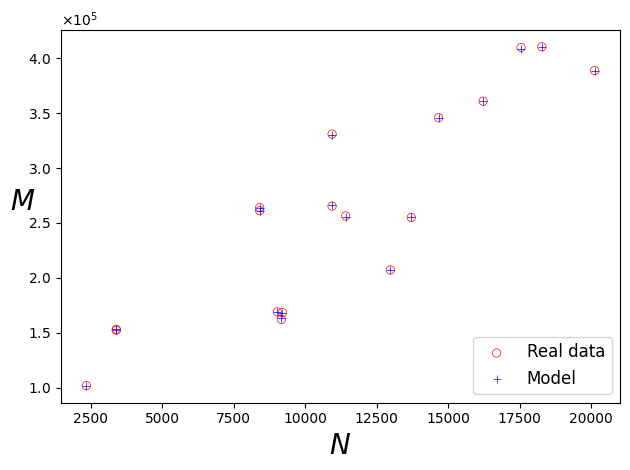

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x=result['N'], y=result['actual'], facecolor='None', edgecolors='r', linewidths=0.5, label='Real data')
ax.scatter(x=result['N'], y=result['theoretical'], marker='+', color='b', linewidths=0.5, label='Model')
ax.set_xlabel(r'$N$', fontsize=20)
ax.set_ylabel(r'$M$', fontsize=20, rotation="horizontal", )
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y",scilimits=(0,0))
ax.legend(loc='lower right', fontsize=12)
fig.tight_layout()